# I. INTRODUCTION

--------------------------------------------------------------------------------------------------------------------------------------

Milestone 2 

Nama    : Rizki Pria Aditama

Batch   : HCK - 007

Program ini dibuat menggunakan dataset dari [Kaggle](https://www.kaggle.com/datasets/vikramamin/customer-churn-decision-tree-and-random-forest).

--------------------------------------------------------------------------------------------------------------------------------------



## Ia. Objective

Sebagai Data Scientist dari perusahaan Liverpool Telekomunikasi, saya mendapat tugas untuk membuat model klasifikasi, untuk meminimalisir kesalahan prediksi, agar customer yang loyal tidak diprediksi sebagai customer yang tidak loyal/churn.

Treatment kepada customer yang loyal, harus berbeda dari customer yang tidak loyal atau berhenti berlangganan, mengingat iuran yang dibayar existing customer ( termasuk customer yang loyal), merupakan revenue bagi perusahaan.

Demi menjaga kesetiaan customer yang loyal, model yang saya buat ditargetkan memiliki score prediksi minimal 80 %.

## Ib. Hugging Face

Berikut Link Deployment di [Hugging Face](https://huggingface.co/spaces/rizkiaditama/Milestone-2) dari program yang dibuat.

## Ic. Conceptual Problems

Jawaban :

Nomor 1 :
- Adanya Overfitting adalah masalah umum dalam machine learning di mana model yang kompleks terlalu "menghafal" data pelatihan, sehingga tidak mampu melakukan generalisasi yang baik pada data baru. Sehigga hal tersebut menjadi latar belakang adanya Bagging (Bootstrap Aggregating).
     
- Cara Kerja Bagging :
    * Bootstrap Sampling: Bagging menggunakan teknik bootstrap sampling, yang melibatkan pemilihan secara acak sejumlah sampel dari data pelatihan dengan penggantian (beberapa sampel dapat dipilih lebih dari sekali, sementara yang lainnya mungkin tidak dipilih sama sekali). Ini menghasilkan sejumlah dataset pelatihan yang berbeda secara acak yang disebut bootstrap samples.

    * Model Base: Bagging juga melibatkan penggunaan model base yang sama, seperti decision trees, random forests, atau classifier/regressor lainnya. Setiap model base dilatih menggunakan salah satu bootstrap sample.

     * Prediksi Aggregasi: Setelah semua model base dilatih, Bagging menghasilkan prediksi dengan menggabungkan hasil prediksi dari semua model. Cara umum untuk menggabungkan prediksi adalah dengan menghitung rata-rata (untuk regresi) atau melakukan voting mayoritas (untuk klasifikasi) dari prediksi-prediksi tersebut.

Nomor 2 : 

Algoritma Random Forest dan algoritma Boosting adalah dua pendekatan yang berbeda dalam pembuatan model ensemble, yang digunakan dalam machine learning untuk meningkatkan kinerja model prediksi. Berikut ini perbedaan utama dalam cara kerja keduanya :

- Proses Pembuatan Model:
    * Random Forest: Random Forest adalah algoritma ensemble yang menggunakan pendekatan "bagging" (bootstrap aggregating). Ini berarti model-model yang berbeda dibuat secara independen dengan menggunakan subset acak dari data pelatihan (dengan penggantian). Setiap model dikenal sebagai "pohon keputusan." Hasil prediksi kemudian diambil dengan cara menggabungkan hasil dari semua pohon keputusan tersebut.
    * Boosting: Algoritma Boosting, seperti AdaBoost atau Gradient Boosting, mengambil pendekatan berbeda. Mereka membangun serangkaian model yang saling tergantung, yang berarti setiap model berikutnya berusaha memperbaiki kesalahan yang dilakukan oleh model sebelumnya. Model-model ini dibuat secara berurutan, dan bobot diberikan kepada setiap sampel pelatihan berdasarkan seberapa salahnya diprediksi oleh model sebelumnya.

- Pemilihan Model Dasar:
    * Random Forest: Setiap pohon keputusan dalam Random Forest dapat dibuat dengan menggunakan seluruh fitur dataset atau hanya sebagian kecil dari fitur secara acak pada setiap langkah. Ini memastikan variasi di antara pohon-pohon tersebut.
    * Boosting: Algoritma Boosting biasanya menggunakan model dasar yang lemah (misalnya, pohon keputusan dangkal atau regresi linear). Model-model ini digunakan secara berurutan dengan menyesuaikan bobot sampel pelatihan untuk meningkatkan prediksi kesalahan model sebelumnya.

- Cara Kombinasi Prediksi:
    * Random Forest: Prediksi dari setiap pohon keputusan diambil secara demokratis, biasanya dengan menghitung rata-rata (untuk regresi) atau melakukan pemilihan mayoritas (untuk klasifikasi).
    * Boosting: Prediksi dari model-model yang dibangun dalam Boosting dikombinasikan dengan memberikan bobot pada setiap prediksi. Model dengan bobot lebih tinggi akan memiliki pengaruh lebih besar dalam prediksi akhir.

- Penanganan Overfitting:
    * Random Forest: Karena variasi dalam subset data pelatihan yang digunakan untuk setiap pohon, Random Forest cenderung lebih tahan terhadap overfitting daripada pohon keputusan tunggal.
    * Boosting: Algoritma Boosting, terutama jika tidak diatur dengan benar, dapat cenderung overfit pada data pelatihan karena upaya mereka untuk memperbaiki kesalahan pada setiap iterasi.

- Kinerja:
    * Random Forest: Random Forest seringkali cocok dengan baik pada berbagai jenis data dan biasanya memiliki kinerja yang stabil.
    * Boosting: Boosting dapat memberikan kinerja yang lebih tinggi daripada Random Forest ketika diatur dengan benar, tetapi bisa lebih sensitif terhadap keberadaan outlier dan memerlukan penyesuaian parameter yang lebih hati-hati.

Nomor 3 :

Cross-validation adalah sebuah metode statistik yang digunakan dalam machine learning dan statistika untuk mengukur kinerja model prediksi secara objektif dan menghindari overfitting. Tujuan utama dari cross-validation adalah untuk membagi dataset menjadi subset yang berbeda untuk melatih dan menguji model secara bersamaan. Ini membantu kita memahami seberapa baik model kita dalam melakukan generalisasi terhadap data yang belum pernah dilihat sebelumnya.

# II. IMPORT LIBRARIES

In [108]:
# Untuk manipulasi dataframe
import pandas as pd

# Untuk operasi aritmatika
import numpy as np

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk handling imbalance data
from imblearn.over_sampling import RandomOverSampler

# Untuk cari korelasi
from sklearn.feature_selection import SelectKBest, chi2

# Untuk define model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Untuk Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, f1_score

# Untuk Preprocess
from sklearn.model_selection import train_test_split

# Untuk scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Untuk membuat pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Untuk Handling outlier
from feature_engine.outliers import Winsorizer

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

# III. DATA LOADING

In [109]:
# Proses Data Loading
df = pd.read_csv('Customer-Churn.csv')


## IIIa. Data Overview

In [110]:
# Menampilkan 10 data pertama
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [111]:
# Menampilkan 10 data terakhir.
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [112]:
# Menampilkan jumlah baris dan kolom dataframe.
df.shape

(7043, 21)

In [113]:
#Menampilkan info dasar dari dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [115]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## IIIb. Data Cleaning

In [116]:
# Membuat copy dataframe.
df_dc = df.copy()

In [117]:
# Cek missing value.
jumlah_missing_per_kolom = df_dc.isna().sum()
print(jumlah_missing_per_kolom)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [118]:
#  cek duplikasi data di dataframe
if df_dc.duplicated().any():
    print("Ada duplikat dalam data.")
else:
    print("Tidak ada duplikat dalam data.")

Tidak ada duplikat dalam data.


In [119]:
# target encoding
df_dc.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [120]:
df_dc.Churn.replace({'No': 1, 'Yes': 0}, inplace=True)
df_dc.Churn.value_counts()

1    5174
0    1869
Name: Churn, dtype: int64

In [121]:
df_dc.drop('customerID', axis=1, inplace=True)
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [122]:
df_dc['TotalCharges'] = df_dc['TotalCharges'].str.replace(' ', '')
df_dc['TotalCharges'] = df_dc['TotalCharges'].str.strip()
df_dc['TotalCharges'] = df_dc['TotalCharges'].replace('', float('nan'))
df_dc['TotalCharges'] = df_dc['TotalCharges'].astype(float)

missing_values = df_dc.isna().sum()

# Menghitung jumlah total entri di setiap kolom
total_values = df_dc.count()

# Menghitung persentase nilai yang hilang
percentage_missing = (missing_values / total_values) * 100

# Menampilkan hasil
print("Jumlah Missing Value:")
print(missing_values)
print("\nPersentase Missing Value:")
print(percentage_missing)



Jumlah Missing Value:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Persentase Missing Value:
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod 

In [123]:
df_dc_cleaned = df_dc.dropna()

missing_values = df_dc_cleaned.isna().sum()

# Menghitung jumlah total entri di setiap kolom
total_values = df_dc_cleaned.count()

# Menghitung persentase nilai yang hilang
percentage_missing = (missing_values / total_values) * 100

# Menampilkan hasil
print("Jumlah nilai yang hilang:")
print(missing_values)
print("\nPersentase nilai yang hilang:")
print(percentage_missing)
print()
df_dc_cleaned.info()

Jumlah nilai yang hilang:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Persentase nilai yang hilang:
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: flo

## Summary 

* Dataset terdiri dari 21 kolom dan 7043 baris.
* Rekapitulasi tipe data dalam dataset :
    - Float : 1
    - Integer : 2
    - Object : 18
* Tidak terdapat data duplikat dalam dataset.
* Terdapat missing value di kolom TotalCharges, sebanyak 11 baris (0,15 %). Handling sudah dilakukan.
* Kolom customerID di drop karena mengandung terlalu banyak value, dan tergolong high cardinality.
* Melakukan label encoder, di kolom target yaitu kolom churn, value no menjadi 0, value yes menjadi 1.

# IV. EXPLORATORY DATA ANALYSIS (EDA)

Pada session ini, saya akan memberikan beberapa visualisasi singkat yang dapat memberikan *insight* kepada bisnis.

In [124]:
# Membuat copy dataframe khusus sesi EDA.

df_eda = df.copy()

## IVa. Jumlah Pelanggan yang Berlangganan *Streaming TV* dan *Streaming Movies*.

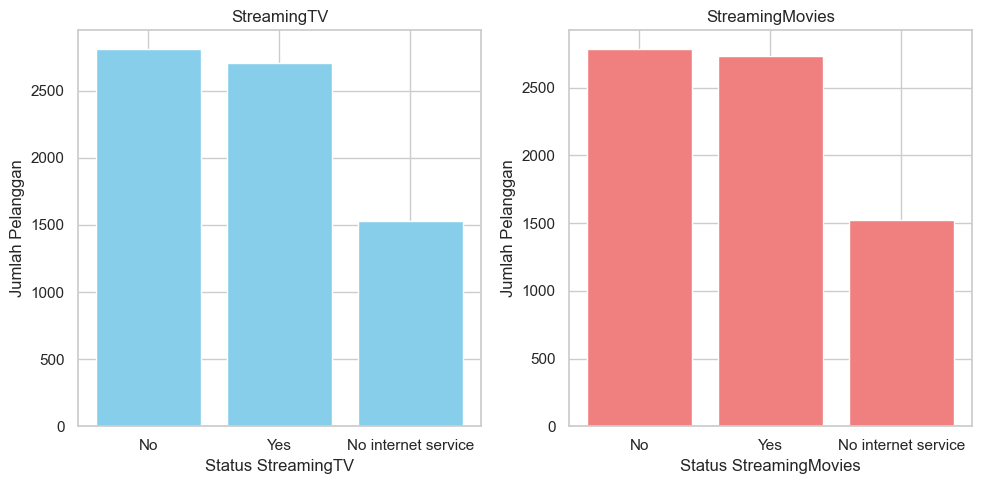


Distribusi Pelanggan di layanan Streaming TV:
Berlangganan: 2707
Tidak Berlangganan: 2810
Tidak Ada Internet: 1526

Distribusi Pelanggan di Layanan Streaming Movies:
Berlangganan: 2732
Tidak Berlangganan: 2785
Tidak Ada Internet: 1526


In [125]:
# Menghitung jumlah pelanggan yang menggunakan StreamingTV dan StreamingMovies
streaming_tv_counts = df_eda['StreamingTV'].value_counts()
streaming_movies_counts = df_eda['StreamingMovies'].value_counts()

# Membuat visualisasi
plt.figure(figsize=(10, 5))

# Diagram batang StreamingTV
plt.subplot(1, 2, 1)
plt.bar(streaming_tv_counts.index, streaming_tv_counts.values, color='skyblue')
plt.title('StreamingTV')
plt.xlabel('Status StreamingTV')
plt.ylabel('Jumlah Pelanggan')

# Diagram batang StreamingMovies
plt.subplot(1, 2, 2)
plt.bar(streaming_movies_counts.index, streaming_movies_counts.values, color='lightcoral')
plt.title('StreamingMovies')
plt.xlabel('Status StreamingMovies')
plt.ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()
#Pastikan Anda telah menggantikan 'nama_file.csv' dengan nama file yang berisi data Anda dan telah mengimpor data ke dalam dataframe. Kode di atas akan menghasilkan dua diagram batang terpisah untuk "StreamingTV" dan "StreamingMovies" dengan jumlah pelanggan yang menggunakan dan tidak menggunakan layanan tersebut. Anda dapat menyesuaikan tampilan dan warna sesuai kebutuhan Anda.

# Menghitung jumlah nilai unik di kolom StreamingTV
streaming_tv_counts = df_eda['StreamingTV'].value_counts()

# Menghitung jumlah nilai unik di kolom StreamingMovies
streaming_movies_counts = df_eda['StreamingMovies'].value_counts()

# Menampilkan hasil

print("\nDistribusi Pelanggan di layanan Streaming TV:")
print("Berlangganan:", streaming_tv_counts['Yes'])
print("Tidak Berlangganan:", streaming_tv_counts['No'])
print("Tidak Ada Internet:", streaming_tv_counts['No internet service'])

print("\nDistribusi Pelanggan di Layanan Streaming Movies:")
print("Berlangganan:", streaming_movies_counts['Yes'])
print("Tidak Berlangganan:", streaming_movies_counts['No'])
print("Tidak Ada Internet:", streaming_movies_counts['No internet service'])







Dari visualisasi diatas, dapat disimpulkan :
    
* Customer yang berlangganan layanan Streaming TV berjumlah 2707 orang, selisih 103 orang dari customer yang tidak berlangganan yang berjumlah 2810. Sisanya 1526 tidak berlangganan, karena tidak memiliki koneksi internet.
    
* Customer yang berlangganan layanan Streaming Movies berjumlah 2732 orang, selisih 53 orang dari customer yang tidak berlangganan yang berjumlah 2785. Sisanya 1526 tidak berlangganan, karena tidak memiliki koneksi internet.

Terdapat potensi penambahan revenue dari 2810 orang yang belum berlangganan Streaming TV dan 2785 orang yang belum berlanggan Streaming Movies. Strategi marketing/promo bisa segera dibuat untuk akuisisi tersebut diatas.

## IVb. Distribusi Gender

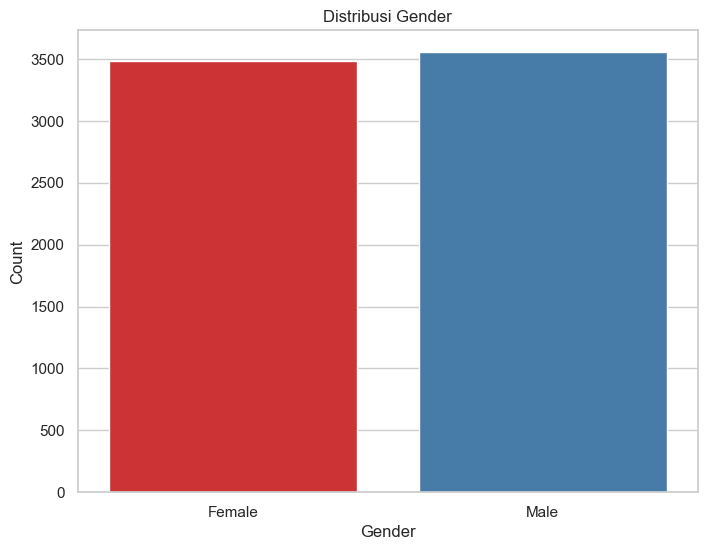

Distribusi Gender:
Male      3555
Female    3488
Name: gender, dtype: int64


In [126]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda,x='gender', palette="Set1")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribusi Gender")
plt.show()
gender_counts = df_eda['gender'].value_counts()
print('Distribusi Gender:')
print(gender_counts)

Dari visualisasi diatas, dapat disimpulkan :
- Jumlah customer laki-laki sejumlah 3555 orang, lebih banyak dari customer perempuan sebanyak 3488 orang.

## IVc. Distribusi Metode Pembayaran

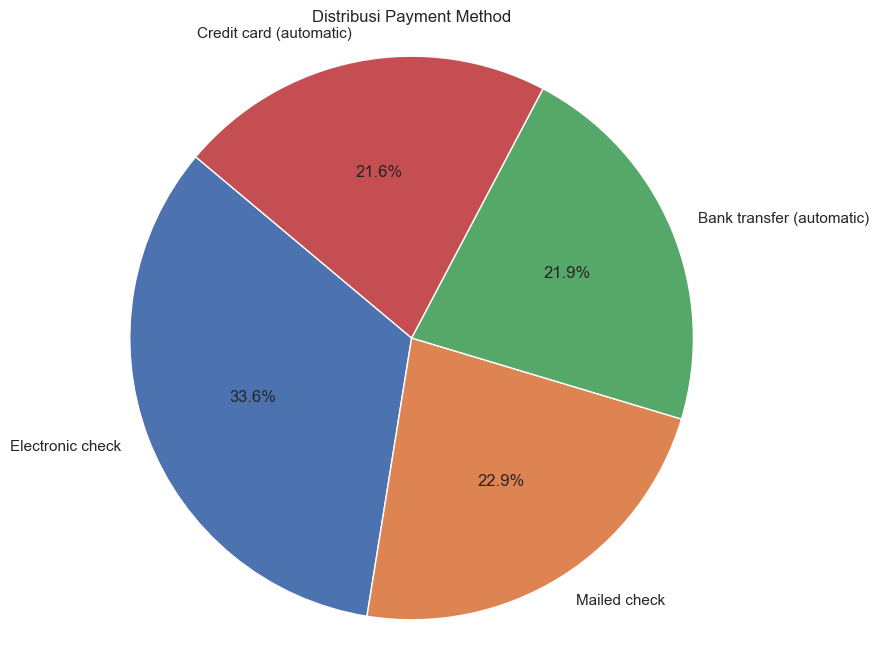


Distribusi Metode Pembayaran:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [127]:
payment_method_counts = df_eda['PaymentMethod'].value_counts()

# Membuat plot diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts.values, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribusi Payment Method")
plt.axis('equal')
plt.show()
print()
print('Distribusi Metode Pembayaran:')
print(payment_method_counts)

Dari visualisasi diatas, dapat disimpulkan :
* Cek elektronik merupakan metode pembayaran yang paling banyak digunakan oleh customer untuk membayar tagihan. Untuk menjaga kontinuitas pembayaran tagihan, jumlah customer yang membayar menggunakan autodebet, baik kredit maupun kredit perlu ditingkatkan. Fitur auotdebet mengautomasi pembayaran tagihan, meminimalisir resiko telat membayar tagihan. 



## VId. Distribusi Metode Pembayaran

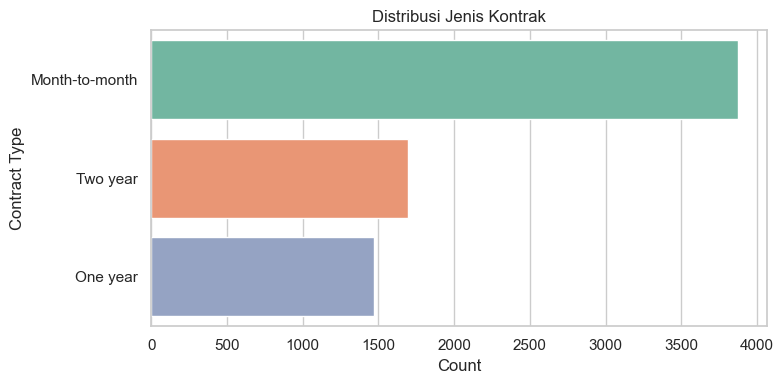


Distribusi Jenis Kontrak:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [128]:
# Menghitung jumlah setiap jenis kontrak
contract_counts = df_eda['Contract'].value_counts()

# Membuat plot horizontal bar
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.barplot(x=contract_counts.values, y=contract_counts.index, palette='Set2')
plt.ylabel("Contract Type")
plt.xlabel("Count")
plt.title("Distribusi Jenis Kontrak")
plt.tight_layout()
plt.show()
print()
print('Distribusi Jenis Kontrak:')
print(contract_counts)

Dari visualisasi di atas, dapat disimpulkan :

Customer yang membayar tagihan per bulan merupakan yang paling banyak. Untuk menjaga loyalitas customer, pembayaran tagihan langsung untuk 1 tahun dan 2 tahun harus ditingkatkan, dengan cara , misal : memberikan potongan harga kepada customer yang langsung membayar tagihan selama satu tahun/ lebih.

## IVe. Loyalitas Pelanggan

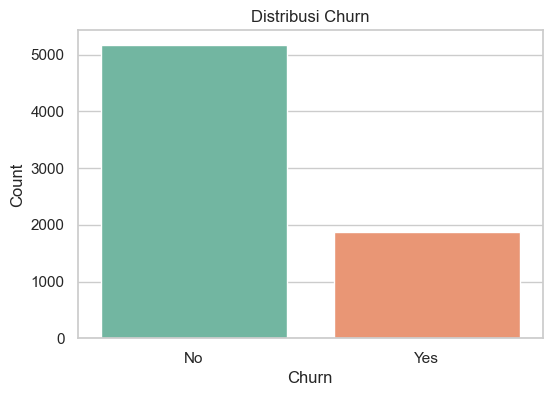


Distribusi Loyalitas Pelanggan:
No     5174
Yes    1869
Name: Churn, dtype: int64


In [129]:
churn_counts = df_eda['Churn'].value_counts()

# Membuat plot diagram lingkaran
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.countplot(data=df_eda, x='Churn', palette='Set2')
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribusi Churn")
plt.show()
print()
print('Distribusi Loyalitas Pelanggan:')
print(churn_counts)

Dari visualisasi diatas, dapat disimpulkan :

Customer yang loyal jauh lebih banyak dari customer yang berhenti berlangganan. Pola perilaku mereka lah yang akan di pelajari oleh model yang akan dibuat. Agar calon customer yang memiliki trait yang sama, mendapat treatment yang seharusnya.

## IVe. EDA Conclusion

* Terdapat potensi revenue dari 2810 orang yang belum berlangganan Streaming TV dan 2785 yang belum berlangganan Streaming Movies.

* Customer berjenis kelamin pria lebih banyak dari customer berjenis kelamin perempuan.

* Mayoritas customer, membayar tagihan menggunakan cek elektronik. Untuk meningkatkan dan menjaga kontinuitas pembayaran tagihan, customer lama dan customer baru, mungkin bisa diarahkan untuk membayar tagihan dengan metode autodebet, baik kredit ataupun debit untuk mengautomasi proses pembayaran dan meminimalisir keterlambatan pembyaran tagihan karena lupa.

* Pembayaran tagihan per bulan menjadi pilihan terbanyak dari customer. Pembayaran iuran lumpsump, atau sekaligus untuk 1 tahun atau lebih bisa ditingkatkan untuk menjaga loyalitas customer.

* Customer yang loyal berjumlah lebih banyak dari customer yang berhenti berlangganan. Menunjukan perusahaan dalam keadaan sehat. Pola-pola dair customer yang loyal yang akan dipelajari dalam pembuatan model ini.

# V. FEATURE ENGINEERING

In [130]:
df_feat_eng = df_dc_cleaned.copy()

## Va. Cardinality

In [131]:
# Cek kardinalitas di kolom kategorikal
categorical_col = df_feat_eng[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]

for i in categorical_col.columns:
    print(f'cardinality columns {i}:', categorical_col[i].nunique())

cardinality columns gender: 2
cardinality columns SeniorCitizen: 2
cardinality columns Partner: 2
cardinality columns Dependents: 2
cardinality columns PhoneService: 2
cardinality columns MultipleLines: 3
cardinality columns InternetService: 3
cardinality columns OnlineSecurity: 3
cardinality columns OnlineBackup: 3
cardinality columns DeviceProtection: 3
cardinality columns TechSupport: 3
cardinality columns StreamingTV: 3
cardinality columns StreamingMovies: 3
cardinality columns Contract: 3
cardinality columns PaperlessBilling: 2
cardinality columns PaymentMethod: 4


Dari hasil cek kardinalitas, tidak ada kolom yang tergolong high cardinality.

In [132]:
# Menampilkan nilai unik yang ada di kolom kategorikal.
capture_cardinality = df_feat_eng[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']]


for i in capture_cardinality.columns:
    print(f'cardinality kolom {i}:', capture_cardinality[i].value_counts())

cardinality kolom gender: Male      3549
Female    3483
Name: gender, dtype: int64
cardinality kolom SeniorCitizen: 0    5890
1    1142
Name: SeniorCitizen, dtype: int64
cardinality kolom Partner: No     3639
Yes    3393
Name: Partner, dtype: int64
cardinality kolom Dependents: No     4933
Yes    2099
Name: Dependents, dtype: int64
cardinality kolom PhoneService: Yes    6352
No      680
Name: PhoneService, dtype: int64
cardinality kolom MultipleLines: No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
cardinality kolom InternetService: Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
cardinality kolom OnlineSecurity: No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
cardinality kolom OnlineBackup: No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
ca

Menampilkan nilai unik dari masing-masing kolom kategorikal. Karena, value nya masih berbentuk object, akan dilakukan label encoding setelah ini.

### Va.1. Label Encoder

In [133]:
df_feat_eng['gender'] = df_feat_eng['gender'].replace({'Male': 1, 'Female': 0})
df_feat_eng['Partner'] = df_feat_eng['Partner'].replace({'Yes' : 1, 'No': 0})
df_feat_eng['Dependents'] = df_feat_eng['Dependents'].replace({'Yes' : 1, 'No': 0})
df_feat_eng['PhoneService'] = df_feat_eng['PhoneService'].replace({'Yes' : 1, 'No': 0})
df_feat_eng['MultipleLines'] = df_feat_eng['MultipleLines'].replace({'No' : 0, 'No phone service': 1,'Yes' : 2 })
df_feat_eng['InternetService'] = df_feat_eng['InternetService'].replace({'No' : 0, 'DSL': 1, 'Fiber optic':2})
df_feat_eng['OnlineSecurity'] = df_feat_eng['OnlineSecurity'].replace({'No' : 0, 'No internet service': 1,'Yes' : 2 })
df_feat_eng['OnlineBackup'] = df_feat_eng['OnlineBackup'].replace({'No' : 0, 'No internet service': 1,'Yes' : 2 })
df_feat_eng['DeviceProtection'] = df_feat_eng['DeviceProtection'].replace({'No' : 0, 'No internet service': 1,'Yes' : 2 })
df_feat_eng['TechSupport'] = df_feat_eng['TechSupport'].replace({'No' : 0, 'No internet service': 1,'Yes' : 2 })
df_feat_eng['StreamingTV'] = df_feat_eng['StreamingTV'].replace({'No' : 0, 'No internet service': 1,'Yes' : 2 })
df_feat_eng['StreamingMovies'] = df_feat_eng['StreamingMovies'].replace({'No' : 0, 'No internet service': 1,'Yes' : 2 })
df_feat_eng['Contract'] = df_feat_eng['Contract'].replace({'Month-to-month' : 0, 'One year': 1,'Two year' : 2 })
df_feat_eng['PaperlessBilling'] = df_feat_eng['PaperlessBilling'].replace({'No' : 0, 'Yes' : 1 })
df_feat_eng['PaymentMethod'] = df_feat_eng['PaymentMethod'].replace({'Electronic check' : 0, 'Mailed check' : 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)' : 3  })
df_feat_eng.head(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,1,0,2,0,0,0,0,0,1,0,29.85,29.85,1
1,1,0,0,0,34,1,0,1,2,0,2,0,0,0,1,0,1,56.95,1889.50,1
2,1,0,0,0,2,1,0,1,2,2,0,0,0,0,0,1,1,53.85,108.15,0
3,1,0,0,0,45,0,1,1,2,0,2,2,0,0,1,0,2,42.30,1840.75,1
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,0


Values di kolom kategorikal sudah berbentuk angka, untuk bisa diolah oleh model.

## Vb. Data Preprocessing

In [134]:
# Split data fitur dan data target
X= df_feat_eng.drop('Churn', axis=1) #fitur
y= df_feat_eng['Churn'] #target

In [135]:
# Split menjadi train dan test
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3,
                                                  random_state=2023,
                                                   stratify=y
                                                   )

In [136]:
# Menampilkan size data
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (4922, 19)
Test Size  :  (2110, 19)
Train Size :  (4922,)
Test Size  :  (2110,)


## Vc. Handling Outlier

In [137]:
numeric_col = df_feat_eng[['tenure','MonthlyCharges','TotalCharges']]
# Cek kenormalan data menggunakan skewness
normal_numeric_data = []
non_normal_numeric_data = []
for i in numeric_col.columns :
    skew = numeric_col[i].skew()
    if (skew >=0.5) | (skew <=-0.5):
        non_normal_numeric_data.append(i)

    elif (skew<0.5) & (skew >=-0.5):
        normal_numeric_data.append(i)

    print('Skewness dari', i ,'adalah', skew )

Skewness dari tenure adalah 0.23773083190513133
Skewness dari MonthlyCharges adalah -0.22210292770166232
Skewness dari TotalCharges adalah 0.9616424997242504


Cek skewness masing-masing kolom numeric.

In [138]:
normal_numeric_data

['tenure', 'MonthlyCharges']

In [139]:
non_normal_numeric_data

['TotalCharges']

Terdapat distribusi data yang  normal di kolom tenure dan monthlycharges, dan distribusi data yang tidak normal di kolom totalcharges. Untuk distrubsi normal, akan di handling outlier menggunakan metode capping gaussian. Untuk distribusi tidak normal akan di handling menggunakan metode capping iqr.

In [140]:
capping_normal_numeric = Winsorizer(capping_method='gaussian',
                             tail='both',
                             fold=3,
                             variables= normal_numeric_data)

capping_normal_numeric_train = capping_normal_numeric.fit_transform(X_train[normal_numeric_data])
capping_normal_numeric_test = capping_normal_numeric.transform(X_test[normal_numeric_data])


In [141]:
capping_non_normal_numeric = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables= non_normal_numeric_data)

capping_non_normal_numeric_train = capping_non_normal_numeric.fit_transform(X_train[non_normal_numeric_data])
capping_non_normal_numeric_test = capping_non_normal_numeric.transform(X_test[non_normal_numeric_data])

In [142]:
capped_df_train = pd.concat([capping_normal_numeric_train,capping_non_normal_numeric_train],axis = 1)
capped_df_test = pd.concat([capping_normal_numeric_test,capping_non_normal_numeric_test],axis = 1)

Outlier berhasil di handle.

## Vd. Scaling

Melakukan Scaling untuk kolom numerik, yang bertujuan untuk percepatan konvergensi, menghindari dominasi fitur, dan meningkatkan performa model. metode yang digunakan ada MinMaxScaler.

In [143]:
scaler = MinMaxScaler()

capped_df_train[numeric_col.columns] = scaler.fit_transform(capped_df_train[numeric_col.columns])
capped_df_test[numeric_col.columns] = scaler.transform(capped_df_test[numeric_col.columns])

capped_df_train[numeric_col.columns]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.114214,0.001289
448,0.098592,0.761596,0.086379
5916,1.000000,0.941147,0.953146
4389,0.408451,0.817955,0.340204
2172,0.000000,0.254863,0.002933
...,...,...,...
3760,0.028169,0.550623,0.024920
3315,0.915493,0.887282,0.820135
4744,0.887324,0.016459,0.137512
7037,1.000000,0.027431,0.163324


Scaling berhasil dilakukan.

## Ve. Feature Selection

Pada sesi ini, akan di define kolom kategorikal untuk dicari korelasinya dengan target untuk berikutnya dicari yang paling besar nilainya dan dipilih untuk pemodelan.

In [144]:
X_train_categorical = X_train.drop(columns = capped_df_train.columns)
X_test_categorical = X_test.drop(columns = capped_df_train.columns)

In [145]:
print(X_train_categorical.shape)  # Untuk melihat jumlah baris di X_train_categorical
print(y_train.shape)  # Untuk melihat jumlah baris di y_train


(4922, 16)
(4922,)


In [146]:
# seleksi fitur menggunakan uji statistik Chi-squared (chi2)
selector = SelectKBest(score_func=chi2, k=5) #--> memilih 5 fitur terbaik

# memanggil metode fit pada objek selector untuk menyesuaikan model dengan data pelatihan
selector.fit(X_train_categorical, y_train)

# Buat DataFrame dengan nama kolom fitur
df_scores = pd.DataFrame({'Feature': X_train_categorical.columns,
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# Tampilkan DataFrame  berdasarkan skor Chi-squared
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores.head()

,Feature,Score,p-value
13,Contract,749.180459,0.0
7,OnlineSecurity,372.064457,0.0
10,TechSupport,334.909767,0.0
15,PaymentMethod,314.018491,0.0
6,InternetService,236.029145,0.0


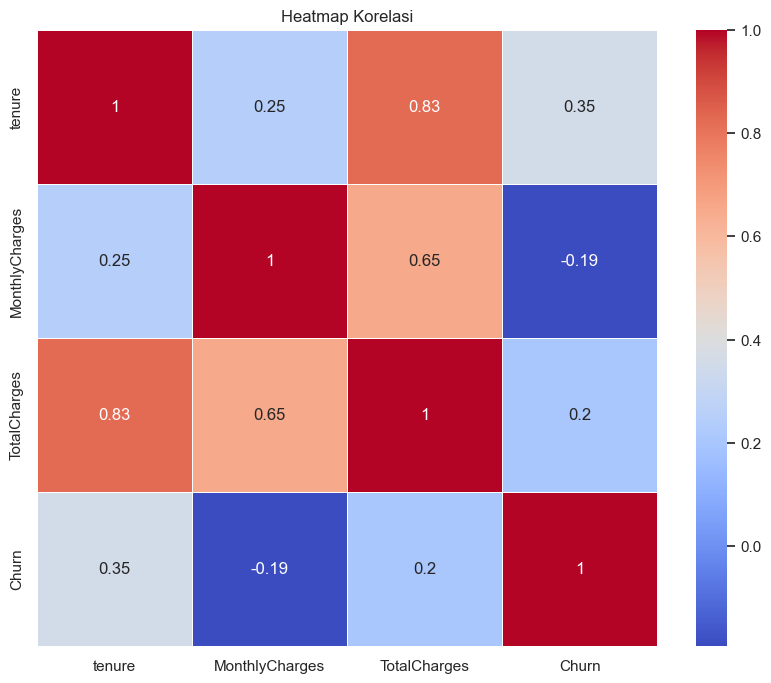

In [147]:
numeric_cols = df_feat_eng.drop(columns = categorical_col)
# Hitung matriks korelasi
correlation_matrix = numeric_cols.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

In [148]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


data_VIF = capped_df_train[['tenure','MonthlyCharges','TotalCharges']]

calc_vif(data_VIF)

,variables,VIF
0,tenure,6.493144
1,MonthlyCharges,3.529282
2,TotalCharges,9.960020


In [149]:
selected_numeric_df = capped_df_train.drop(columns = ['TotalCharges']) # --> drop dari nilai yang terbesar dulu, running cell dengan menambah satu persatu kolom dengan nilai vif diatas 5.
calc_vif(selected_numeric_df)

,variables,VIF
0,tenure,2.261252
1,MonthlyCharges,2.261252


Dari hasil visualisasi heatmap, dan metode VIF terpilih 2 kolom dari kolom numerikal yaitu tenure dan MonthlyCharges.

## Vf. Pipeline Preprocess

Pembuatan pipeline pada proses preprocess untuk memudahkan load data di model inference.

In [150]:
# pipeline untuk kolom
num_pipeline = Pipeline([
        ('outlier',Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=['MonthlyCharges','tenure'])),
        ('scaler', MinMaxScaler())
        ])

num_tr = num_pipeline.fit_transform(X_train[['tenure','MonthlyCharges']])
num_tr

array([[0.        , 0.11421446],
       [0.09859155, 0.76159601],
       [1.        , 0.94114713],
       ...,
       [0.88732394, 0.01645885],
       [1.        , 0.02743142],
       [0.94366197, 0.35610973]])

In [151]:
# pipeline untuk kolom kategorikal
cat_pipeline = Pipeline([
            (   'passthrough', None),
            (    'selector',SelectKBest(score_func=chi2, k=5))

])

cat_tr = cat_pipeline.fit_transform(X_train[['Contract', 'OnlineSecurity','TechSupport','PaymentMethod','InternetService']],y_train)
cat_tr_arr = np.array(cat_tr)

cat_tr_arr

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 2],
       [2, 2, 2, 3, 2],
       ...,
       [2, 1, 1, 2, 0],
       [2, 1, 1, 2, 0],
       [2, 2, 0, 2, 1]], dtype=int64)

In [152]:
# menggabungkan pipeline kategorikal dengan numerikal
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['tenure','MonthlyCharges']),
        ("cat", cat_pipeline, ['Contract', 'OnlineSecurity','TechSupport','PaymentMethod','InternetService']),
    ])

train_tr = full_pipeline.fit_transform(X_train,y_train)
train_tr

array([[0.        , 0.11421446, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.09859155, 0.76159601, 0.        , ..., 0.        , 0.        ,
        2.        ],
       [1.        , 0.94114713, 2.        , ..., 2.        , 3.        ,
        2.        ],
       ...,
       [0.88732394, 0.01645885, 2.        , ..., 1.        , 2.        ,
        0.        ],
       [1.        , 0.02743142, 2.        , ..., 1.        , 2.        ,
        0.        ],
       [0.94366197, 0.35610973, 2.        , ..., 0.        , 2.        ,
        1.        ]])

In [153]:
# transform pipeline gabungan dan dijadikan variabel baru
test_tr = full_pipeline.transform(X_test)
test_tr

array([[0.74647887, 0.4713217 , 2.        , ..., 2.        , 3.        ,
        1.        ],
       [0.33802817, 0.86334165, 0.        , ..., 2.        , 2.        ,
        2.        ],
       [0.01408451, 0.52169576, 0.        , ..., 0.        , 0.        ,
        2.        ],
       ...,
       [0.45070423, 0.47880299, 0.        , ..., 0.        , 3.        ,
        1.        ],
       [0.66197183, 0.20947631, 2.        , ..., 2.        , 1.        ,
        1.        ],
       [1.        , 0.86982544, 2.        , ..., 2.        , 2.        ,
        2.        ]])

Pipeline preprocess selesai dibuat.

## Vg. Handling Imbalance Data

Karena distribusi data di kolom target tidak balance, akan di handling menggunakan metode ovemsampler.

In [154]:

from imblearn.over_sampling import RandomOverSampler


# Inisialisasi oversampler, (data dibawha 1m, jadi pakai oversampler)
oversampler = RandomOverSampler(sampling_strategy='minority')


# Melakukan oversampling pada data training
X_train_resampled, y_train_resampled = oversampler.fit_resample(train_tr, y_train)

# Konversi fitur dan target yang telah di-resample menjadi DataFrame (jika belum)
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['Churn'])
X_train_resampled_df = pd.DataFrame(X_train_resampled)
# Hitung jumlah masing-masing kelas
class_counts = y_train_resampled_df['Churn'].value_counts()

# Tampilkan hasil
print(class_counts)


1    3614
0    3614
Name: Churn, dtype: int64


Data di kolom target sudah seimbang.

# VI. MODEL DEFINITION

Model yang akan di define : KNN, SVM, Decision Tree, Random Forest & Ada Boost.

In [155]:
# define model KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_resampled_df, y_train_resampled_df)

KNeighborsClassifier()

In [156]:
#define model SVM
model_svm = SVC()
model_svm.fit(X_train_resampled_df, y_train_resampled_df)

SVC()

In [157]:
#define model DecisionTree
from sklearn.tree import DecisionTreeClassifier
model_dct = DecisionTreeClassifier()
model_dct.fit(X_train_resampled_df, y_train_resampled_df)

DecisionTreeClassifier()

In [158]:
# define model random forest
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_resampled_df, y_train_resampled_df)

RandomForestClassifier()

In [159]:
# define model Ada Booost
model_ada = AdaBoostClassifier()
model_ada.fit(X_train_resampled_df, y_train_resampled_df)

AdaBoostClassifier()

# VII. MODEL TRAINING

Akan di training ke lima model yang telah di define, hasil terbaik akan menjadi model terpilih dan akan di hyperparameter tuning.

In [160]:
from sklearn.model_selection import cross_val_score


recall_train_cross_val = cross_val_score(model_knn,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=5,
                                     scoring="recall")

print('recall - All - Cross Validation  : ', recall_train_cross_val)
print('recall - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

# training model knn

recall - All - Cross Validation  :  [0.7164592  0.69986169 0.67219917 0.70124481 0.73822715]
recall - Mean - Cross Validation :  0.7055984030834894
recall - Std - Cross Validation  :  0.02167931821885389
recall - Range of Test-Set       :  0.6839190848646355 - 0.7272777213023434


In [161]:
recall_train_cross_val = cross_val_score(model_svm,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=5,
                                     scoring="recall")

print('recall - All - Cross Validation  : ', recall_train_cross_val)
print('recall - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

# training model svm

recall - All - Cross Validation  :  [0.70954357 0.71784232 0.68879668 0.70124481 0.73130194]
recall - Mean - Cross Validation :  0.7097458649900575
recall - Std - Cross Validation  :  0.014431868257895022
recall - Range of Test-Set       :  0.6953139967321625 - 0.7241777332479525


In [162]:
recall_train_cross_val = cross_val_score(model_dct,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=5,
                                     scoring="recall")

print('recall - All - Cross Validation  : ', recall_train_cross_val)
print('recall - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

# training model Decision Tree

recall - All - Cross Validation  :  [0.79529737 0.77869986 0.77316736 0.75656985 0.79916898]
recall - Mean - Cross Validation :  0.7805806829806554
recall - Std - Cross Validation  :  0.015473335879712637
recall - Range of Test-Set       :  0.7651073471009427 - 0.7960540188603681


In [163]:
recall_train_cross_val = cross_val_score(model_rf,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=5,
                                     scoring="recall")

print('recall - All - Cross Validation  : ', recall_train_cross_val)
print('recall - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

# training model Random Forest

recall - All - Cross Validation  :  [0.82157676 0.80636238 0.76901798 0.79391425 0.81163435]
recall - Mean - Cross Validation :  0.8005011436650153
recall - Std - Cross Validation  :  0.018094534337534468
recall - Range of Test-Set       :  0.7824066093274809 - 0.8185956780025498


In [164]:
recall_train_cross_val = cross_val_score(model_ada,
                                     X_train_resampled,
                                     y_train_resampled,
                                     cv=5,
                                     scoring="recall")

print('recall - All - Cross Validation  : ', recall_train_cross_val)
print('recall - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

# training model ada

recall - All - Cross Validation  :  [0.73305671 0.73029046 0.69571231 0.7164592  0.73545706]
recall - Mean - Cross Validation :  0.7221951471822162
recall - Std - Cross Validation  :  0.014789372934470732
recall - Range of Test-Set       :  0.7074057742477455 - 0.7369845201166869


              precision    recall  f1-score   support

           0       0.59      0.89      0.71      1308
           1       0.95      0.78      0.86      3614

    accuracy                           0.81      4922
   macro avg       0.77      0.84      0.78      4922
weighted avg       0.86      0.81      0.82      4922


recall Score - Test Set   :  0.7191736604260813 

Classification Report : 
               precision    recall  f1-score   support

           0       0.49      0.75      0.59       561
           1       0.89      0.72      0.79      1549

    accuracy                           0.73      2110
   macro avg       0.69      0.73      0.69      2110
weighted avg       0.78      0.73      0.74      2110
 

Confusion Matrix      : 


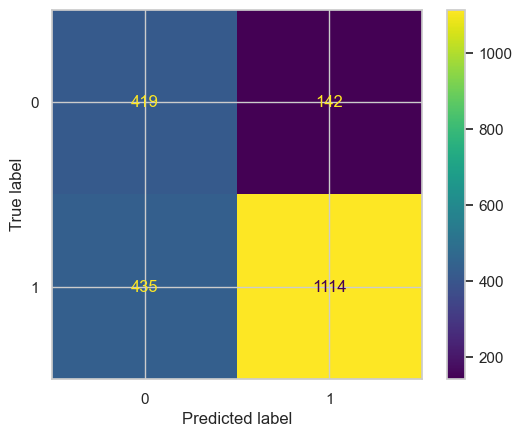

In [165]:
# KNN
model_train = model_knn.predict(train_tr)
print(classification_report(y_train, model_train))
print()
model_test = model_knn.predict(test_tr)
print('recall Score - Test Set   : ', recall_score(y_test, model_test), '\n')
print('Classification Report : \n', classification_report(y_test, model_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_knn, test_tr, y_test))

              precision    recall  f1-score   support

           0       0.50      0.80      0.61      1308
           1       0.91      0.71      0.80      3614

    accuracy                           0.73      4922
   macro avg       0.70      0.75      0.70      4922
weighted avg       0.80      0.73      0.75      4922


recall Score - Test Set   :  0.7249838605551969 

Classification Report : 
               precision    recall  f1-score   support

           0       0.52      0.81      0.63       561
           1       0.91      0.72      0.81      1549

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110
 

Confusion Matrix      : 


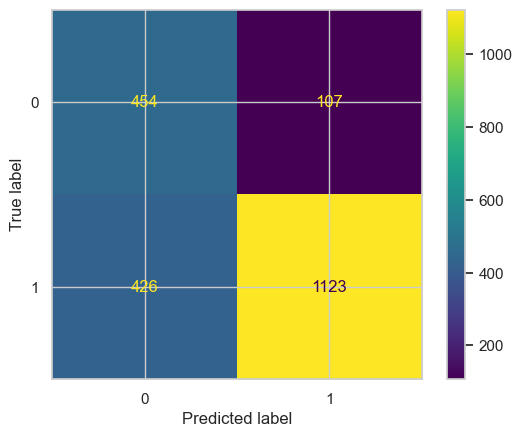

In [166]:
# SVM
model_train = model_svm.predict(train_tr)
print(classification_report(y_train, model_train))
print()
model_test = model_svm.predict(test_tr)
print('recall Score - Test Set   : ', recall_score(y_test, model_test), '\n')
print('Classification Report : \n', classification_report(y_test, model_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_svm, test_tr, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1308
           1       1.00      0.99      0.99      3614

    accuracy                           0.99      4922
   macro avg       0.98      0.99      0.99      4922
weighted avg       0.99      0.99      0.99      4922


recall Score - Test Set   :  0.8263395739186572 

Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.54      0.53       561
           1       0.83      0.83      0.83      1549

    accuracy                           0.75      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.75      0.75      0.75      2110
 

Confusion Matrix      : 


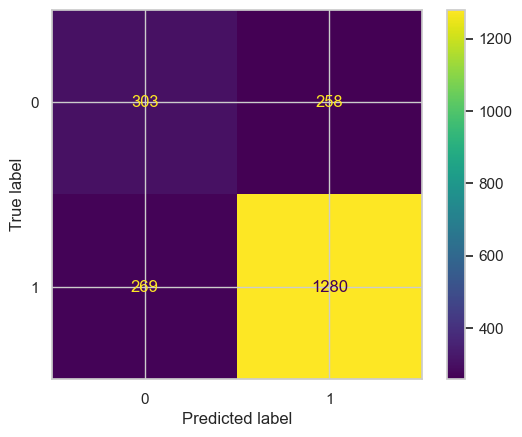

In [167]:
# Decision Tree
model_train = model_dct.predict(train_tr)
print(classification_report(y_train, model_train))
print()
model_test = model_dct.predict(test_tr)
print('recall Score - Test Set   : ', recall_score(y_test, model_test), '\n')
print('Classification Report : \n', classification_report(y_test, model_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_dct, test_tr, y_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1308
           1       1.00      0.99      0.99      3614

    accuracy                           0.99      4922
   macro avg       0.98      0.99      0.99      4922
weighted avg       0.99      0.99      0.99      4922


recall Score - Test Set   :  0.8353776630083926 

Classification Report : 
               precision    recall  f1-score   support

           0       0.55      0.56      0.56       561
           1       0.84      0.84      0.84      1549

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.76      0.76      0.76      2110
 



Confusion Matrix      : 


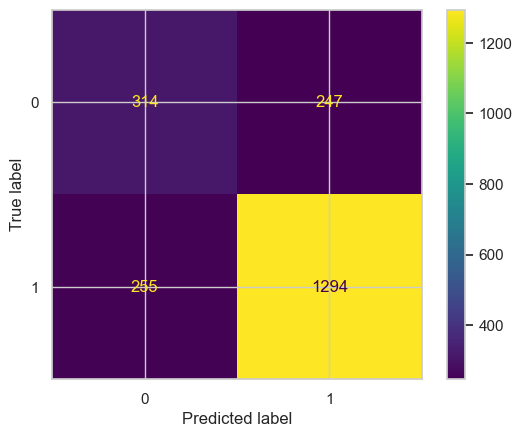

In [168]:
# Random Forest
model_train = model_rf.predict(train_tr)
print(classification_report(y_train, model_train))
print()
model_test = model_rf.predict(test_tr)
print('recall Score - Test Set   : ', recall_score(y_test, model_test), '\n')
print('Classification Report : \n', classification_report(y_test, model_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, test_tr, y_test))

              precision    recall  f1-score   support

           0       0.52      0.81      0.63      1308
           1       0.92      0.73      0.81      3614

    accuracy                           0.75      4922
   macro avg       0.72      0.77      0.72      4922
weighted avg       0.81      0.75      0.76      4922


recall Score - Test Set   :  0.7404777275661717 

Classification Report : 
               precision    recall  f1-score   support

           0       0.53      0.82      0.64       561
           1       0.92      0.74      0.82      1549

    accuracy                           0.76      2110
   macro avg       0.73      0.78      0.73      2110
weighted avg       0.82      0.76      0.77      2110
 



Confusion Matrix      : 


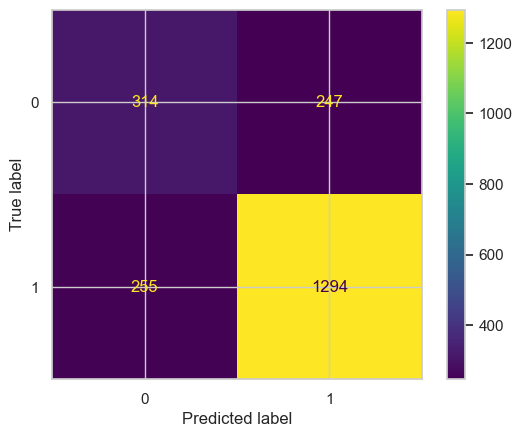

In [169]:
# Ada Boost
model_train = model_ada.predict(train_tr)
print(classification_report(y_train, model_train))
print()
model_test = model_ada.predict(test_tr)
print('recall Score - Test Set   : ', recall_score(y_test, model_test), '\n')
print('Classification Report : \n', classification_report(y_test, model_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, test_tr, y_test))

Random Forest merupakan model pilihan saya, karena memiliki recall score paling tinggi dibanding 4 model lainnya.  recall Score - Test Set   :  0.8366688185926404 .


## VIIa. Hyperparameter Tuning

In [170]:
from sklearn.ensemble  import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV

rand_param = {
    'n_estimators': [10,20,30],  # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah sampel minimum untuk membagi simpul
    'min_samples_leaf': [1, 2, 4],  # Jumlah sampel minimum dalam daun
    'bootstrap': [True, False]  # Apakah akan melakukan bootstrap sampel saat membuat pohon
}
randomforest_randomsearch = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rand_param, n_iter=30, cv=5, scoring='recall', random_state=2023)

# Melatih model dengan kombinasi hyperparameter yang berbeda
randomforest_randomsearch.fit(X_train_resampled_df, y_train_resampled_df)  # Ganti X_train dan y_train dengan data Anda

y_train_pred_randomforest_randomsearch = randomforest_randomsearch.predict(train_tr)

y_test_pred_randomforest_randomsearch = randomforest_randomsearch.predict(test_tr)




In [171]:
mean_rand = randomforest_randomsearch.cv_results_['mean_test_score'].mean()
std_rand = randomforest_randomsearch.cv_results_['mean_test_score'].std()
RandomForest_randcv_best = randomforest_randomsearch.best_params_


print(f'mean randomsearch: {mean_rand}')
print(f'Stdev randomsearch: {std_rand}')
print(f'Best Paramater randomsearch: {RandomForest_randcv_best}')

mean randomsearch: 0.7796385737584114
Stdev randomsearch: 0.0187609297737757
Best Paramater randomsearch: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1308
           1       1.00      0.99      0.99      3614

    accuracy                           0.99      4922
   macro avg       0.98      0.99      0.98      4922
weighted avg       0.99      0.99      0.99      4922


recall Score - Test Set   :  0.8599096191091027 

Classification Report : 
               precision    recall  f1-score   support

           0       0.58      0.52      0.55       561
           1       0.83      0.86      0.85      1549

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110
 

Confusion Matrix      : 


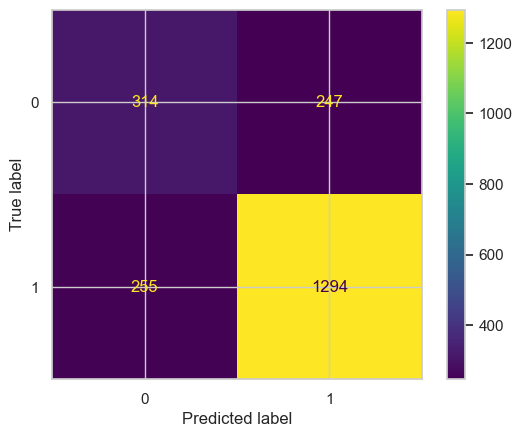

In [172]:
# Random Forest
model_train = randomforest_randomsearch.predict(train_tr)
print(classification_report(y_train, model_train))
print()
model_test = randomforest_randomsearch.predict(test_tr)
print('recall Score - Test Set   : ', recall_score(y_test, model_test), '\n')
print('Classification Report : \n', classification_report(y_test, model_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(model_rf, test_tr, y_test))

Model cenderung Overfit karena nilai train (0.99) lebih besar dari nilai test (0.85). Nilai recall sudah melebihi target yang dicanangkan, yaitu 80 %.

# VIII. MODEL EVALUATION

In [173]:
# Confusion Matrix
# Classification report
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred_randomforest_randomsearch))

# Matriks kebingungan untuk data pelatihan
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_randomforest_randomsearch)
print("Confusion Matrix (Train):\n", confusion_matrix_train_rf)

# Matriks kebingungan untuk data pengujian
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_randomforest_randomsearch)
print("\nConfusion Matrix (Test):\n", confusion_matrix_test_rf)



Classification Report (Test):
               precision    recall  f1-score   support

           0       0.58      0.52      0.55       561
           1       0.83      0.86      0.85      1549

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110

Confusion Matrix (Train):
 [[1294   14]
 [  54 3560]]

Confusion Matrix (Test):
 [[ 294  267]
 [ 217 1332]]


- Untuk kelas 0 (Churn), recallnya adalah 299 / (299 + 219) ≈ 0.57.
- Untuk kelas 1 (Loyal), recallnya adalah 1330 / (1330 + 262) ≈ 0.84.

## VIIIa. EDA Modeling

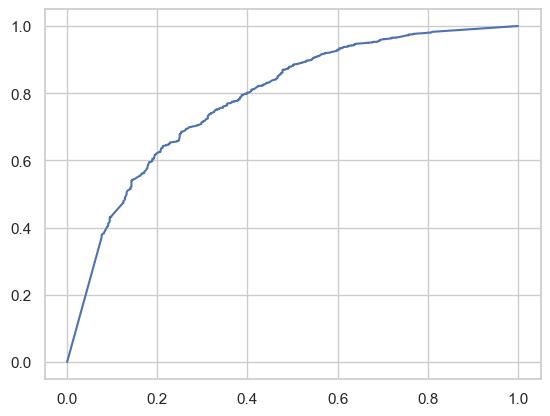

AUC: 0.7845266165624651


In [174]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi positif untuk kelas 1 (No Churn)
y_test_prob = randomforest_randomsearch.predict_proba(test_tr)[:, 1]

# Menghitung FPR, TPR, dan ambang batas
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.show()

# Hitung AUC
auc = roc_auc_score(y_test, y_test_prob)
print(f"AUC: {auc}")

## VIIIb. Pipeline Model

In [175]:
pipeline_model = Pipeline([
    ('Random Forest', RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=rand_param, n_iter=30, cv=5, scoring='recall', random_state=2023))
])

model_tr = pipeline_model.fit(X_train_resampled, y_train_resampled)
model_tr

Pipeline(steps=[('Random Forest',
                 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                                    n_iter=30,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [None, 10,
                                                                       20, 30],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [10,
                                                                          20,
                                                                          30]},
                                    random_state=2023, scoring='recall'))])

## VIIIc. Merge Pipelines

In [176]:
all_process_rizki = Pipeline ([
    ('Pipeline Preprocess', full_pipeline),
    ('Random Forest', pipeline_model)

])

all_process_rizki

Pipeline(steps=[('Pipeline Preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(tail='both',
                                                                              variables=['MonthlyCharges',
                                                                                         'tenure'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('passthrough',
                                                                   None),
                                                                  ('selector',
                                                                   SelectKBest(k=5,
                                                                               score_func=<function chi2 at 0x0000024307423310>))]),
                                                  ['Co...
                                                   'PaymentMethod',
                                                   'InternetService'])])),
                ('Random Forest',
                 Pipeline(steps=[('Random Forest',
                                  RandomizedSearchCV(cv=5,
                                                     estimator=RandomForestClassifier(),
                                                     n_iter=30,
                                                     param_distributions={'bootstrap': [True,
                                                                                        False],
                                                                          'max_depth': [None,
                                                                                        10,
                                                                                        20,
                                                                                        30],
                                                                          'min_samples_leaf': [1,
                                                                                               2,
                                                                                               4],
                                                                          'min_samples_split': [2,
                                                                                                5,
                                                                                                10],
                                                                          'n_estimators': [10,
                                                                                           20,
                                                                                           30]},
                                                     random_state=2023,
                                                     scoring='recall'))]))])

In [177]:
all_process_rizki.fit(X_train, y_train)

Pipeline(steps=[('Pipeline Preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(tail='both',
                                                                              variables=['MonthlyCharges',
                                                                                         'tenure'])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('passthrough',
                                                                   None),
                                                                  ('selector',
                                                                   SelectKBest(k=5,
                                                                               score_func=<function chi2 at 0x0000024307423310>))]),
                                                  ['Co...
                                                   'PaymentMethod',
                                                   'InternetService'])])),
                ('Random Forest',
                 Pipeline(steps=[('Random Forest',
                                  RandomizedSearchCV(cv=5,
                                                     estimator=RandomForestClassifier(),
                                                     n_iter=30,
                                                     param_distributions={'bootstrap': [True,
                                                                                        False],
                                                                          'max_depth': [None,
                                                                                        10,
                                                                                        20,
                                                                                        30],
                                                                          'min_samples_leaf': [1,
                                                                                               2,
                                                                                               4],
                                                                          'min_samples_split': [2,
                                                                                                5,
                                                                                                10],
                                                                          'n_estimators': [10,
                                                                                           20,
                                                                                           30]},
                                                     random_state=2023,
                                                     scoring='recall'))]))])

# IX. MODEL SAVING

In [178]:
with open('all_process_rizki.pkl', 'wb') as file_1:
  pickle.dump(all_process_rizki, file_1)